# Cyfrowe przetwarzanie sygnałów i obrazów
## Laboratorium


## Przetwarzanie i analiza sygnału EKG
- Igor Wlodarczyk
- Jakub Kalecki

## Ćwiczenie 1

In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig

- ekg1.txt

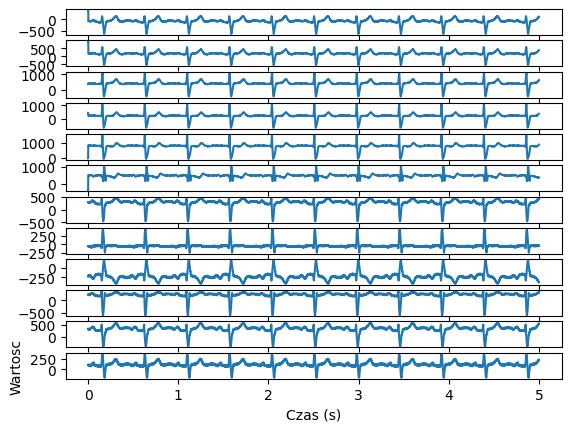

In [25]:
tab = np.loadtxt('ekg1.txt')
tab = np.rot90(tab)
fig, axs = plt.subplots(len(tab))
number_of_samples = len(tab[0])
x = np.arange(0, number_of_samples / 1000, 1 / 1000)
for idx, column in enumerate(tab):
    axs[idx].plot(x, column)
plt.ylabel('Wartosc')
plt.xlabel('Czas (s)') 
plt.show()

- ekg1.txt - wybrane wykresy i przedział czasowy

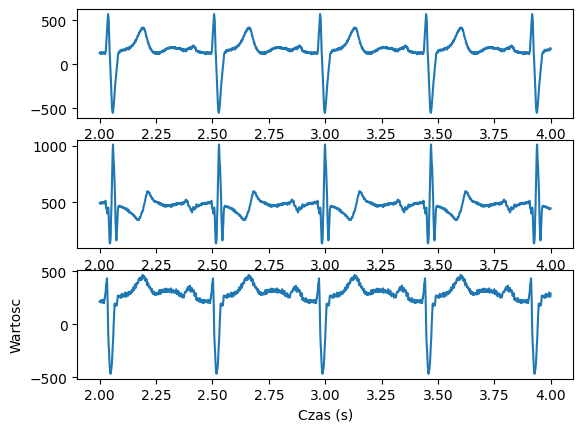

In [26]:
specific_charts = [1, 5, 6]
time_slice = (2, 4)
tab = np.loadtxt('ekg1.txt')
tab = np.rot90(tab)
tab = [y for idx, y in enumerate(tab) if idx in specific_charts]
fig, axs = plt.subplots(len(tab))
number_of_samples = len(tab[0])
x = np.arange(0, number_of_samples / 1000, 1 / 1000)
start_time, end_time = time_slice
start_index = next(idx for idx, value in enumerate(x) if value >= start_time)
end_index = next(idx for idx, value in enumerate(x) if value >= end_time)
x = x[start_index:end_index]
for index, column in enumerate(tab):
    tab[index] = column[start_index:end_index]
for idx, column in enumerate(tab):
    axs[idx].plot(x, column)
plt.ylabel('Wartosc')
plt.xlabel('Czas (s)') 
plt.show()

- ekg100.txt

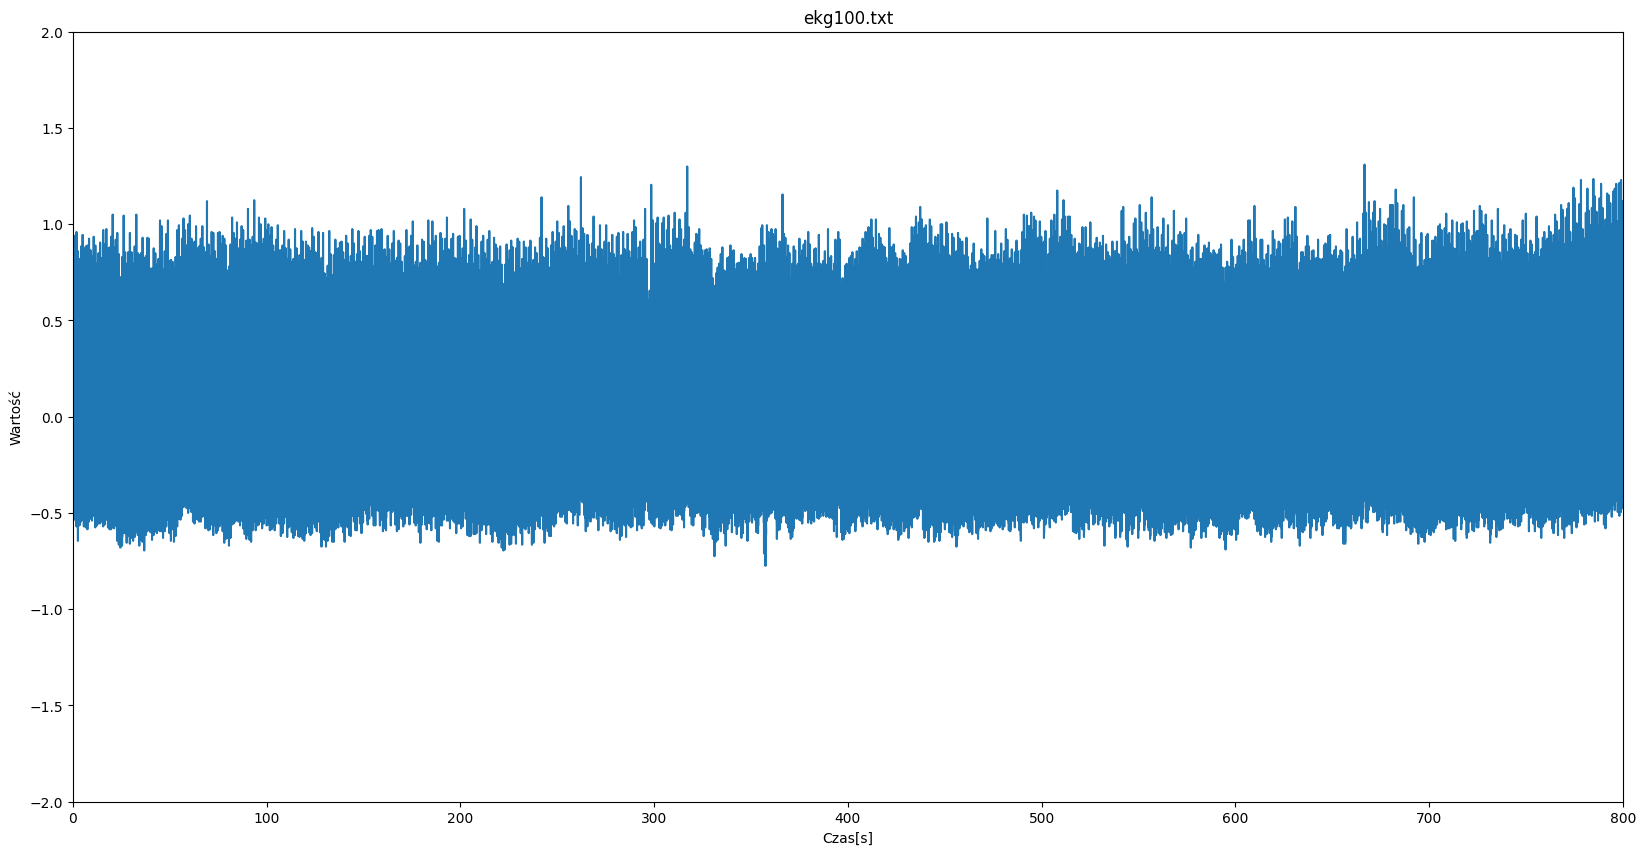

In [27]:
ekg100 = pd.read_csv('ekg100.txt', names=['1'])
sampling_frequency_ekg100 = 360

ekg100['Czas'] = ekg100.index/sampling_frequency_ekg100 
ekg100 = ekg100.set_index('Czas') 

plt.figure(figsize=(20,10))
plt.plot(ekg100.index, ekg100['1'])
plt.title('ekg100.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(0,800)
plt.ylim(-2,2.0)
plt.show()

- fragment wykresu egk100.txt

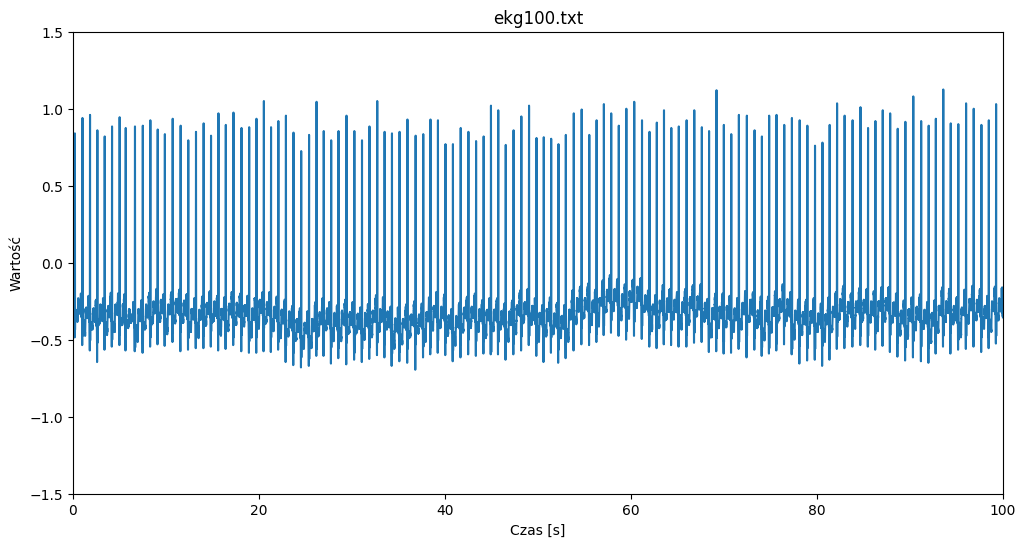

In [28]:
ekg100 = pd.read_csv('ekg100.txt', names=['1'])
sampling_frequency_ekg100 = 360

ekg100['Czas'] = ekg100.index / sampling_frequency_ekg100 
ekg100 = ekg100.set_index('Czas') 

plt.figure(figsize=(12, 6))
plt.plot(ekg100.index, ekg100['1'])
plt.title('ekg100.txt')
plt.xlabel('Czas [s]')
plt.ylabel('Wartość')
plt.xlim(0, 100)
plt.ylim(-1.5, 1.5) 
plt.show()

- ekg_noise.txt

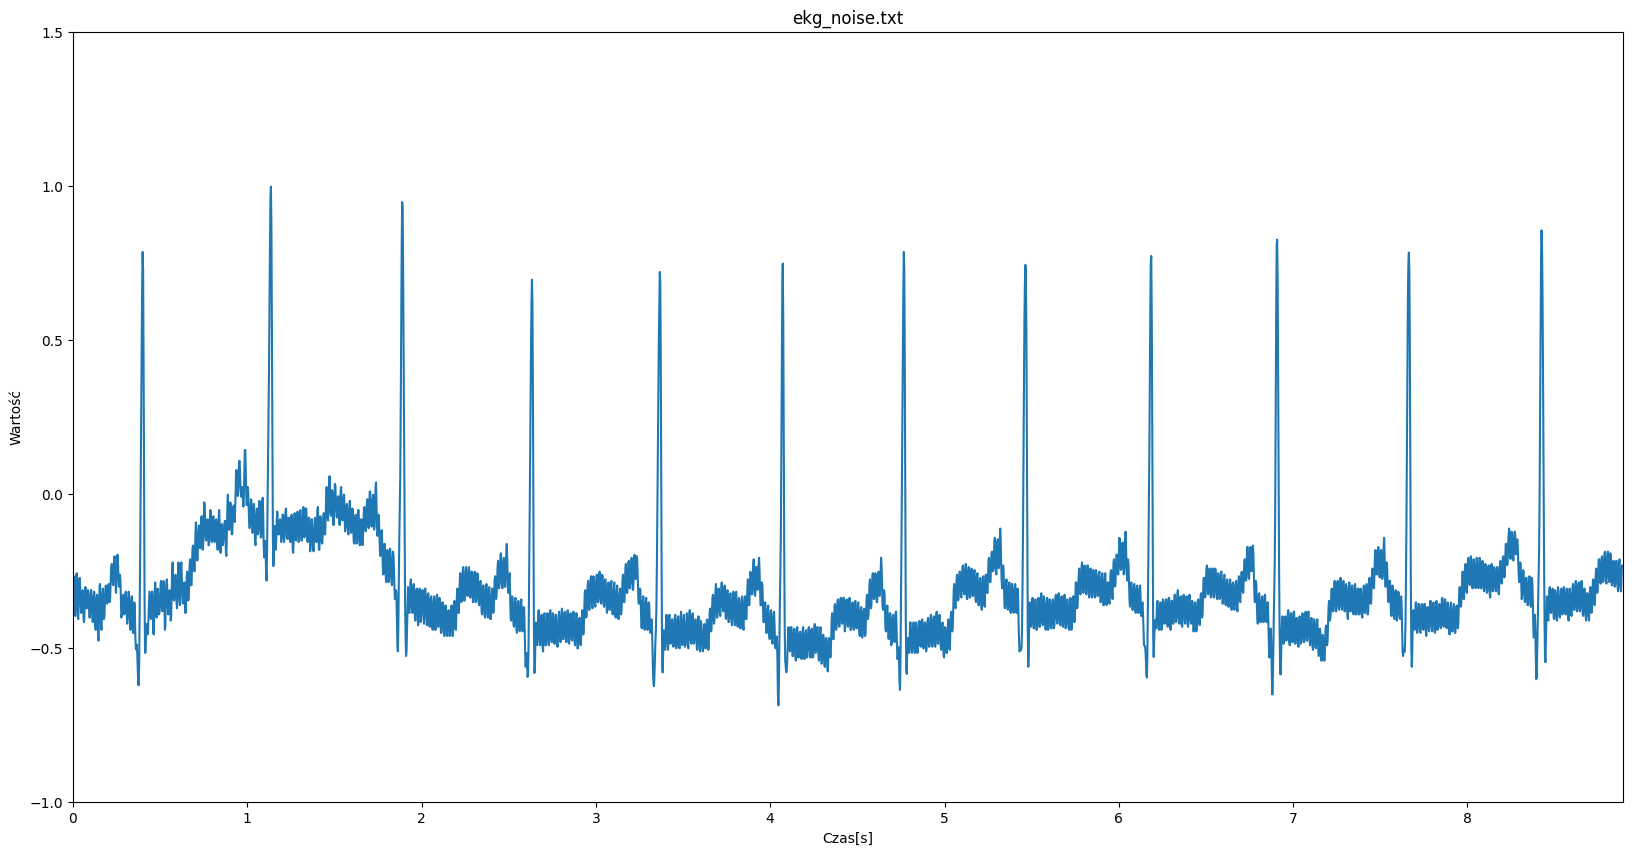

In [29]:
ekg_noise = pd.read_csv('ekg_noise.txt', names=['Czas', 'Wartosc amplitudy'], sep=r'\s+')
sampling_frequency_ekg_noise = 360 

ekg_noise['Czas'] = ekg_noise.index/sampling_frequency_ekg_noise 
ekg_noise = ekg_noise.set_index('Czas')
ekg_noise_time = ((ekg_noise.shape[0])/sampling_frequency_ekg_noise)

plt.figure(figsize=(20,10))
plt.plot(ekg_noise.index, ekg_noise['Wartosc amplitudy'])
plt.title('ekg_noise.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(0, ekg_noise_time)
plt.ylim(-1.0,1.5)

plt.show()

## Ćwiczenie 2

- Wygeneruj ciąg próbek odpowiadający fali sinusoidalnej o częstotliwości 50 Hz i długości 65536.

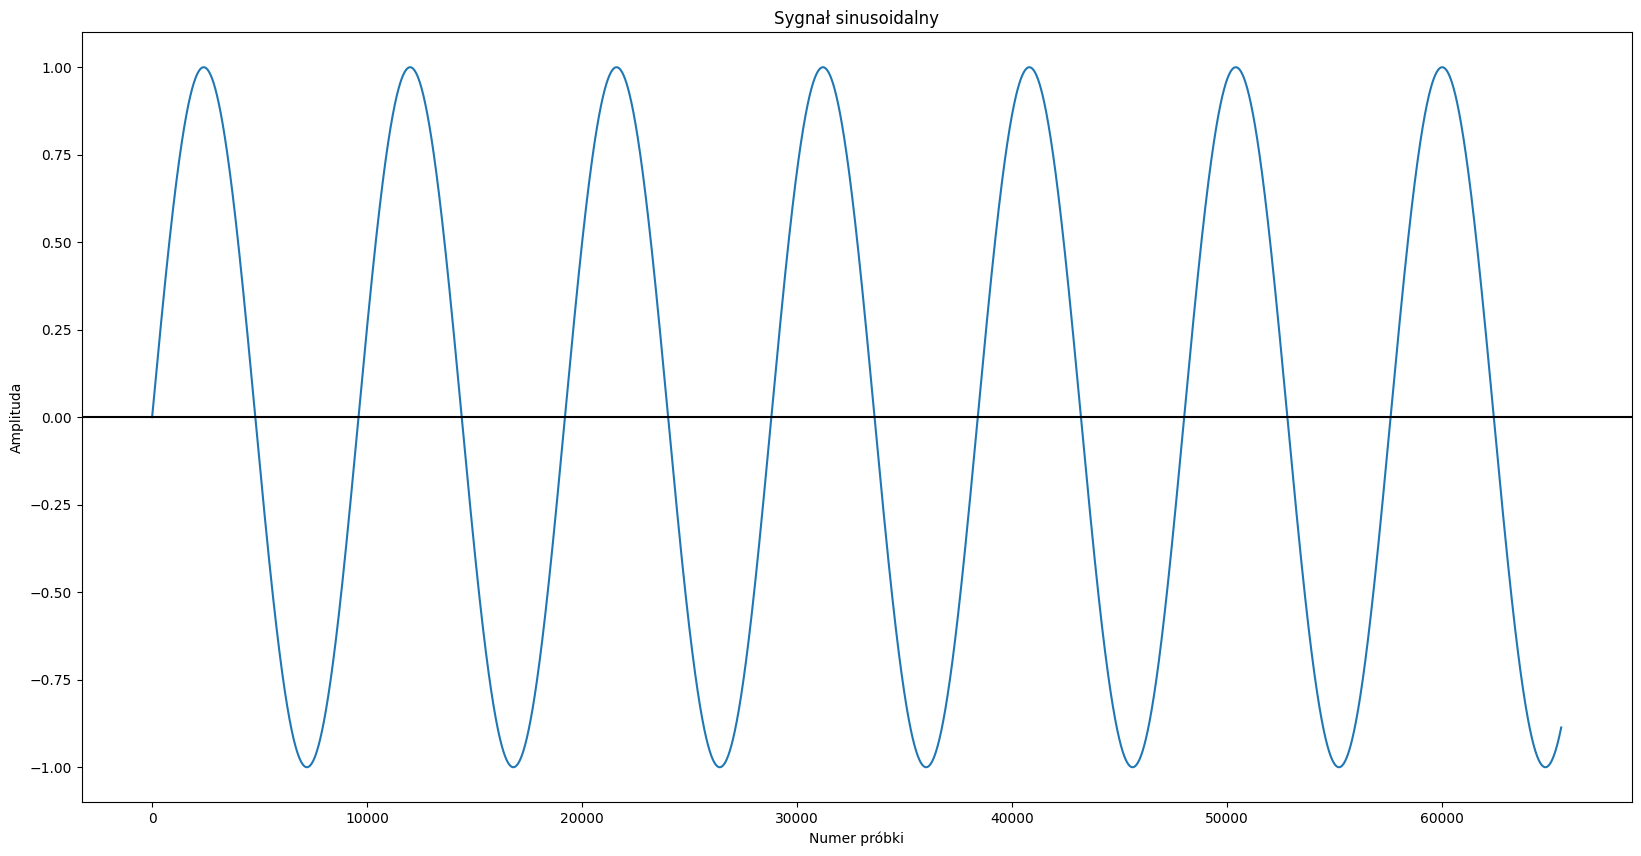

In [47]:
f = 50
length = 65_536
N = np.arange(length)
fs = 480_000

sinus = np.sin(2 * N * np.pi * f/fs) #sin(2 * pi * f * t), t = 1/fs

plt.figure(figsize=(20,10))
plt.plot(N, sinus)
plt.title('Sygnał sinusoidalny')
plt.ylabel('Amplituda')
plt.xlabel('Numer próbki')
plt.axhline(y=0, color='black')
plt.show()

- Wyznacz dyskretną transformatę Fouriera tego sygnału i przedstaw jego widmo amplitudowe na wykresie w zakresie częstotliwości [0, fs/2], gdzie fs oznacza częstotliwość próbkowania.

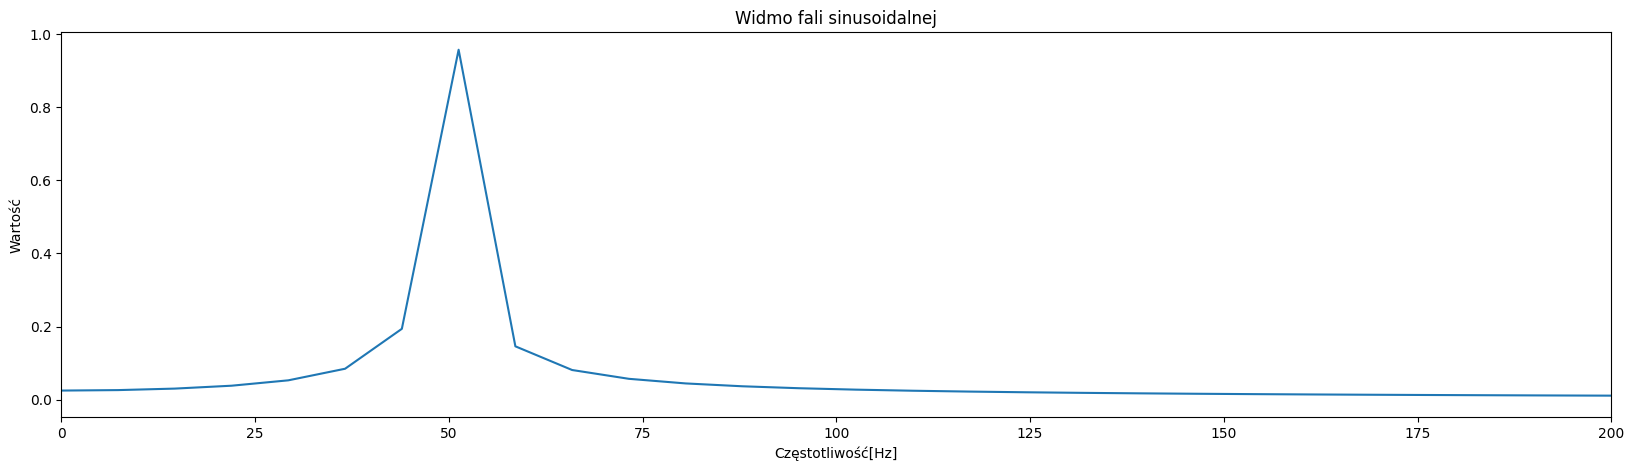

In [48]:
widmo = np.abs(np.fft.rfft(sinus)) / (length/2)
f = np.fft.rfftfreq(length, 1/fs) 

plt.figure(figsize=(20,5))
plt.plot(f, widmo)
plt.title('Widmo fali sinusoidalnej')
plt.ylabel('Wartość')
plt.xlabel('Częstotliwość[Hz]')
plt.xlim(0,200)
plt.show()

- Wygeneruj ciąg próbek mieszaniny dwóch fal sinusoidalnych (tzn. ich kombinacji liniowej) o częstotliwościach 50 i 60 Hz. Wykonaj zadanie z punktu 2 dla tego sygnału.

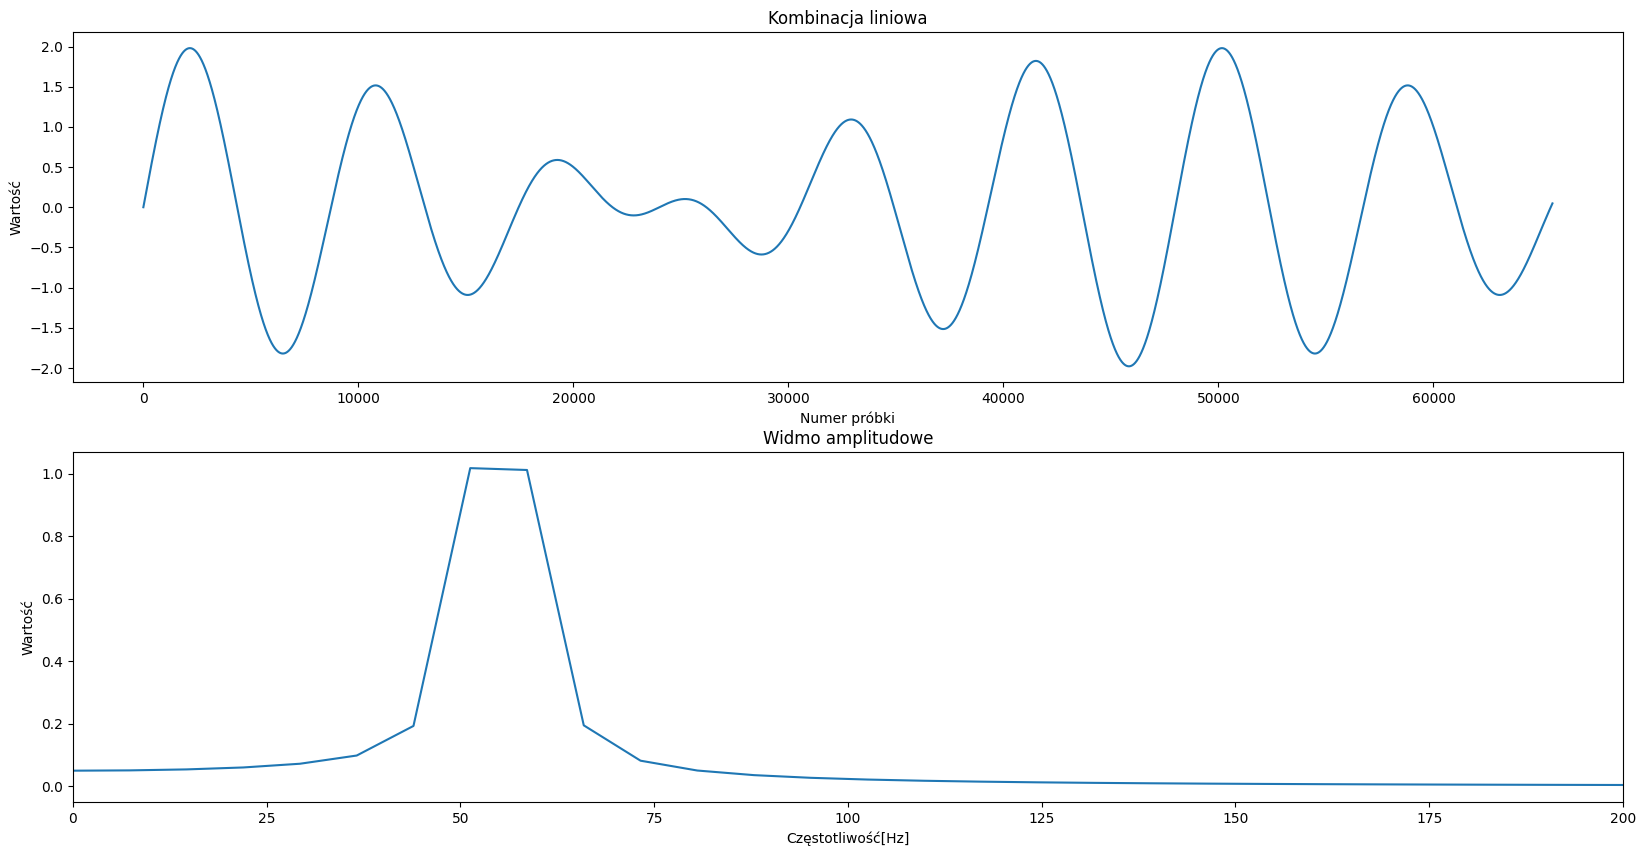

In [32]:
f1 = 50 
f2 = 60 
fs = 480_000

N = np.arange(length) 

y1 = np.sin(2 * np.pi * N * f1/fs) 
y2 = np.sin(2 * np.pi * N * f2/fs) 

widmo = np.abs(np.fft.rfft(y1 + y2)) / (length/2)

plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1) 
plt.plot(N,y1 + y2)
plt.title('Kombinacja liniowa')
plt.xlabel('Numer próbki')
plt.ylabel('Wartość')

plt.subplot(2, 1, 2) 
plt.plot(f, widmo)
plt.xlim(0, 200)
plt.title('Widmo amplitudowe')
plt.xlabel('Częstotliwość[Hz]')
plt.ylabel('Wartość')

plt.show()

- Powtórz eksperymenty dla różnych czasów trwania sygnałów, tzn. dla różnych częstotliwości próbkowania.

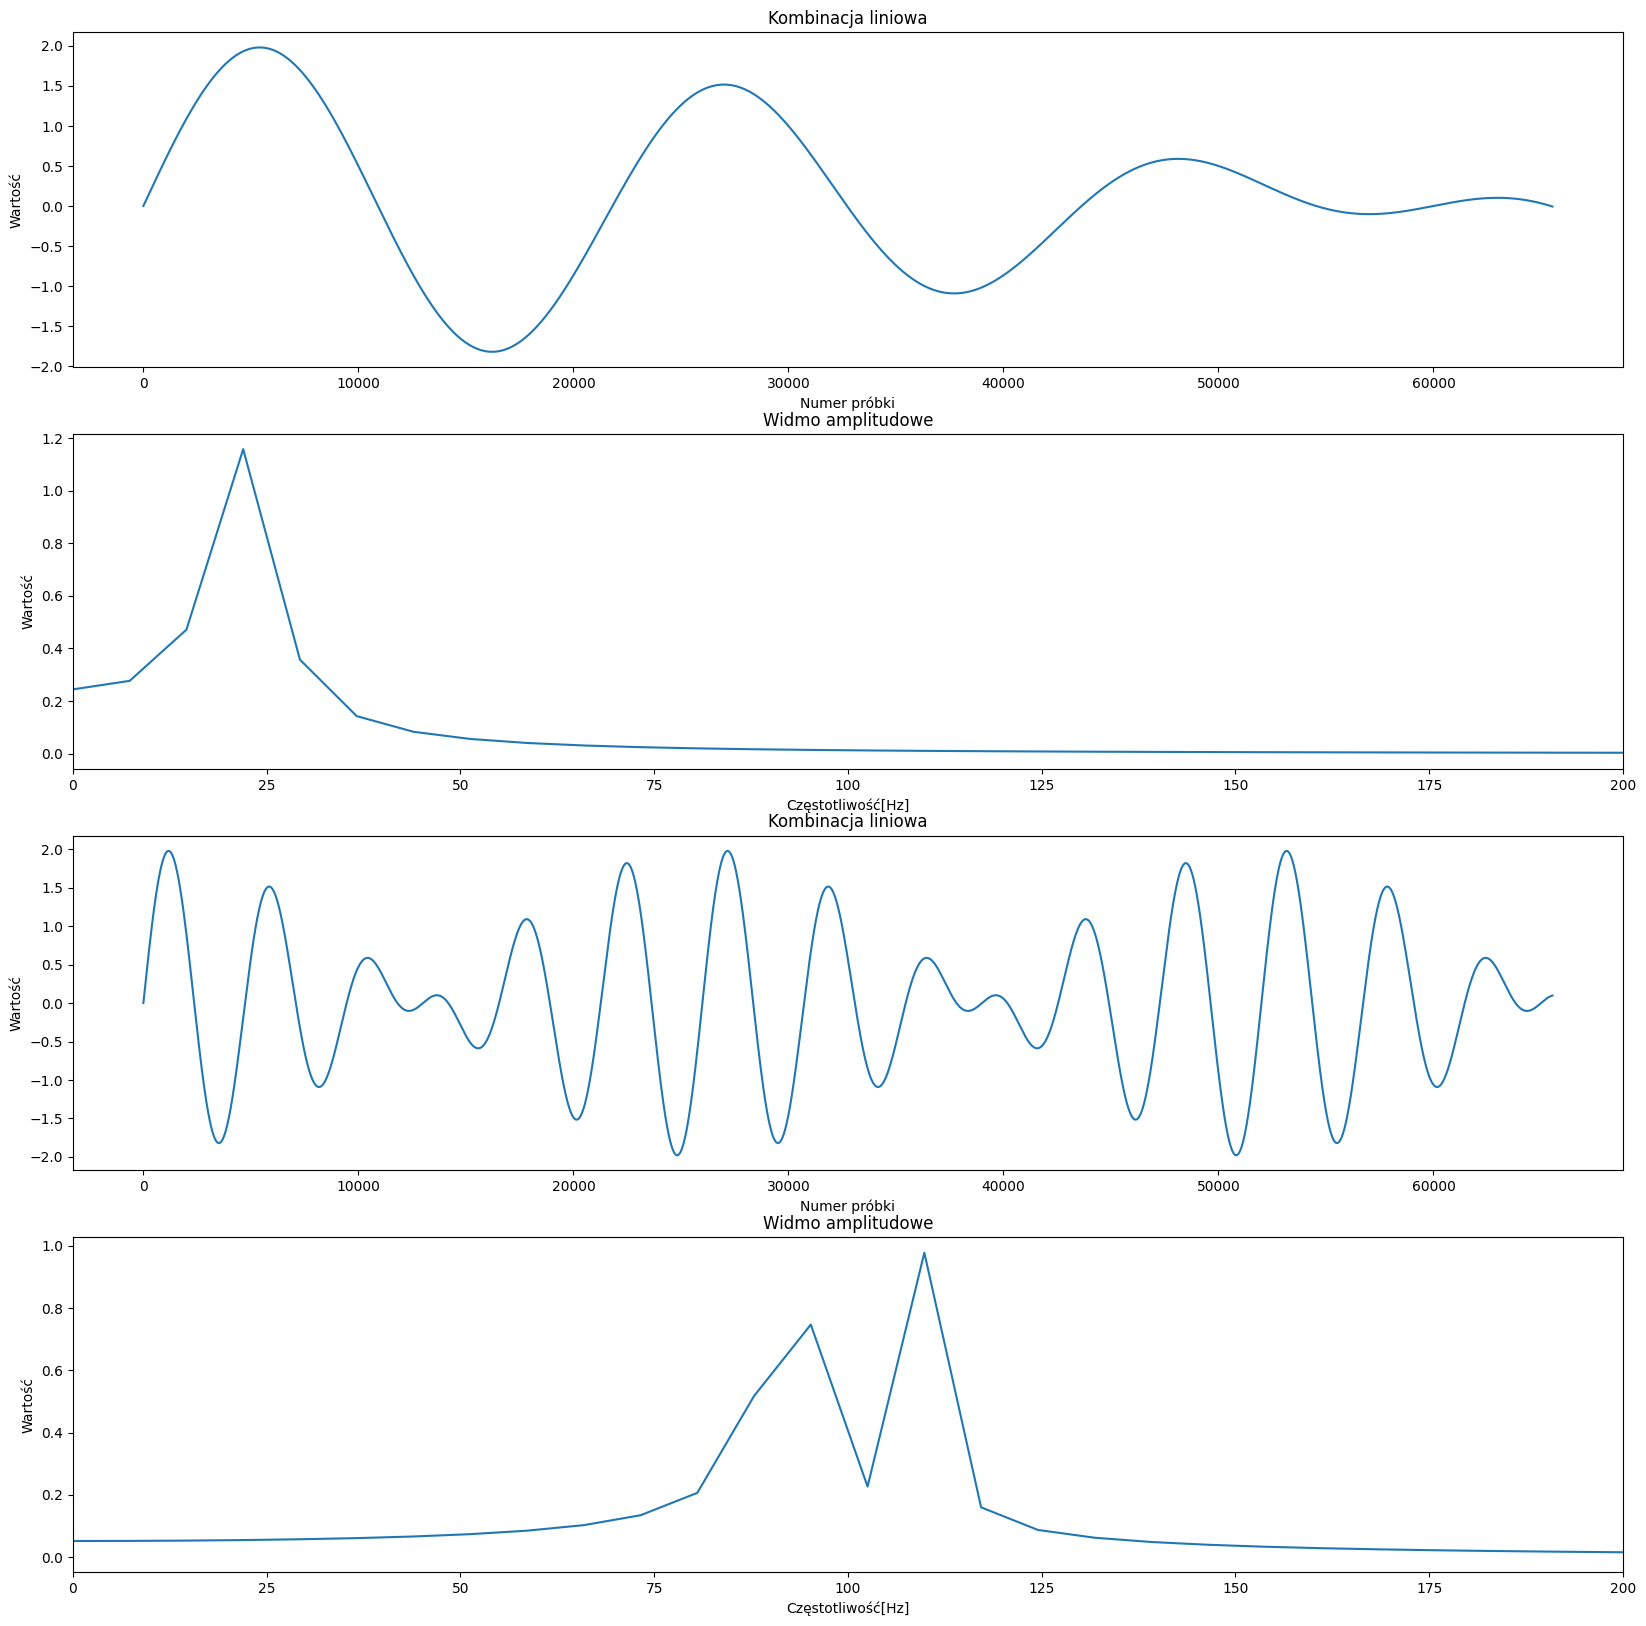

In [33]:
fs = 1200_000
N = np.arange(length) 

y1 = np.sin(2 * np.pi * N * f1/fs) 
y2 = np.sin(2 * np.pi * N * f2/fs) 

widmo = np.abs(np.fft.rfft(y1 + y2)) / (length/2)

plt.figure(figsize=(20,20))

plt.subplot(4, 1, 1) 
plt.plot(N,y1 + y2)
plt.title('Kombinacja liniowa')
plt.xlabel('Numer próbki')
plt.ylabel('Wartość')

plt.subplot(4, 1, 2) 
plt.plot(f, widmo)
plt.xlim(0, 200)
plt.title('Widmo amplitudowe')
plt.xlabel('Częstotliwość[Hz]')
plt.ylabel('Wartość')

fs = 260_000
N = np.arange(length) 

y1 = np.sin(2 * np.pi * N * f1/fs) 
y2 = np.sin(2 * np.pi * N * f2/fs) 

widmo = np.abs(np.fft.rfft(y1 + y2)) / (length/2)

plt.subplot(4, 1, 3) 
plt.plot(N,y1 + y2)
plt.title('Kombinacja liniowa')
plt.xlabel('Numer próbki')
plt.ylabel('Wartość')

plt.subplot(4, 1, 4) 
plt.plot(f, widmo)
plt.xlim(0, 200)
plt.title('Widmo amplitudowe')
plt.xlabel('Częstotliwość[Hz]')
plt.ylabel('Wartość')

plt.show()

- Wyznacz odwrotne transformaty Fouriera ciągów wyznaczonych w zadaniu 2 i porównaj z ciągami oryginalnymi.

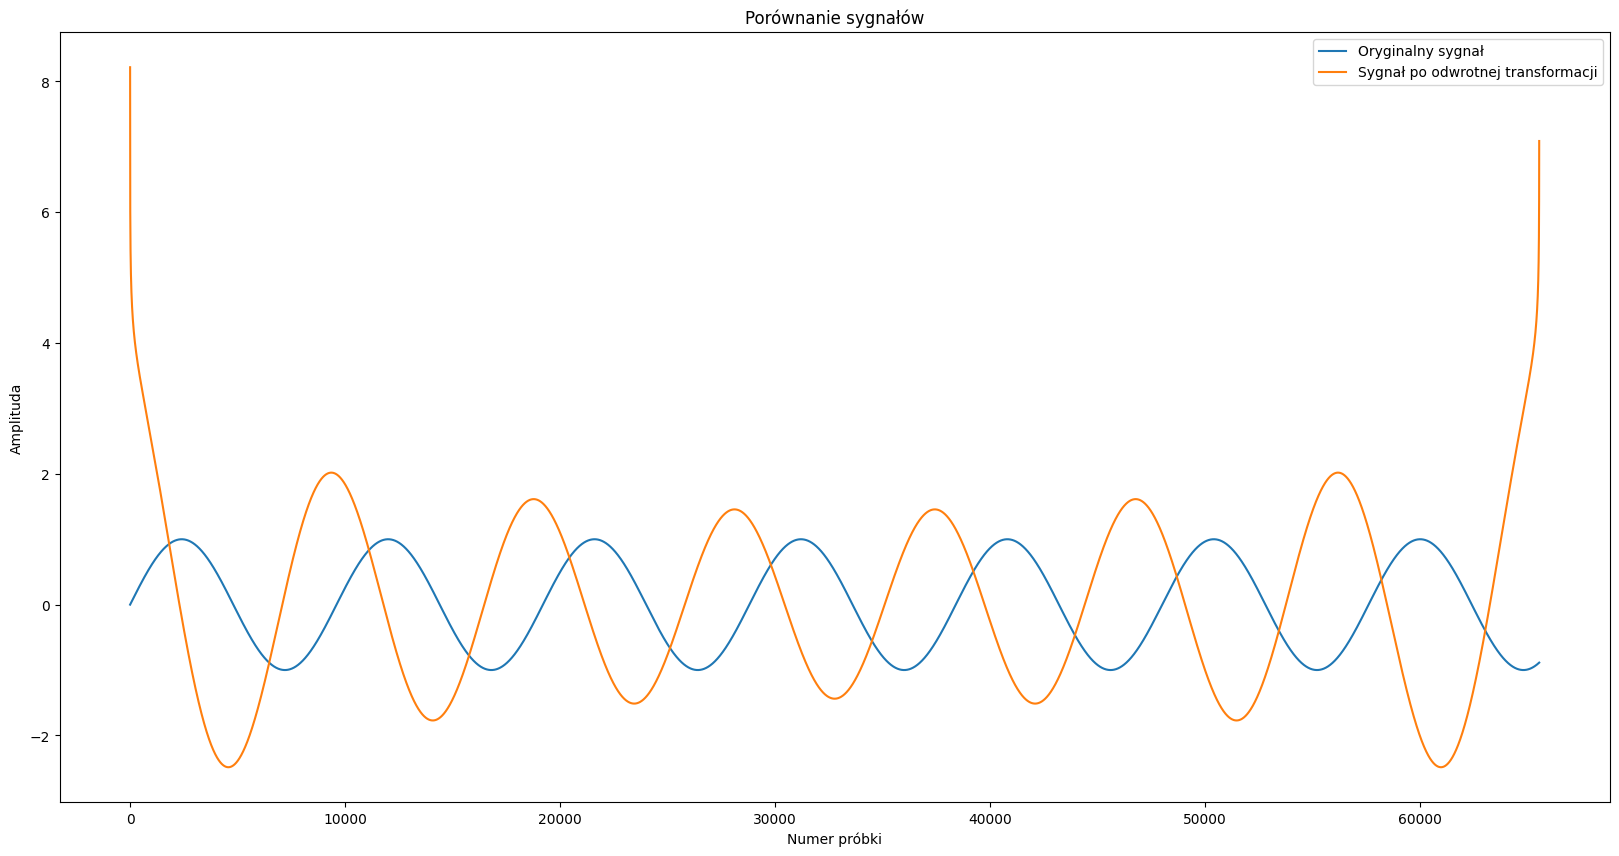

In [34]:
f = 50
length = 65536
N = np.arange(length)
fs = 480000

sinus = np.sin(2 * np.pi * f * N / fs)

widmo = np.abs(np.fft.rfft(sinus)) / (length / 2)
frequencies = np.fft.rfftfreq(length, 1/fs)

inverse_transform_sinus = np.fft.irfft(widmo) * length

plt.figure(figsize=(20, 10))
plt.plot(N, sinus, label='Oryginalny sygnał')
plt.plot(N, inverse_transform_sinus[:length], label='Sygnał po odwrotnej transformacji')
plt.title('Porównanie sygnałów')
plt.ylabel('Amplituda')
plt.xlabel('Numer próbki')
plt.legend()
plt.show()

## Ćwiczenie 3

- Wczytać sygnał ekg100.txt i ocenić go wizualnie na wykresie

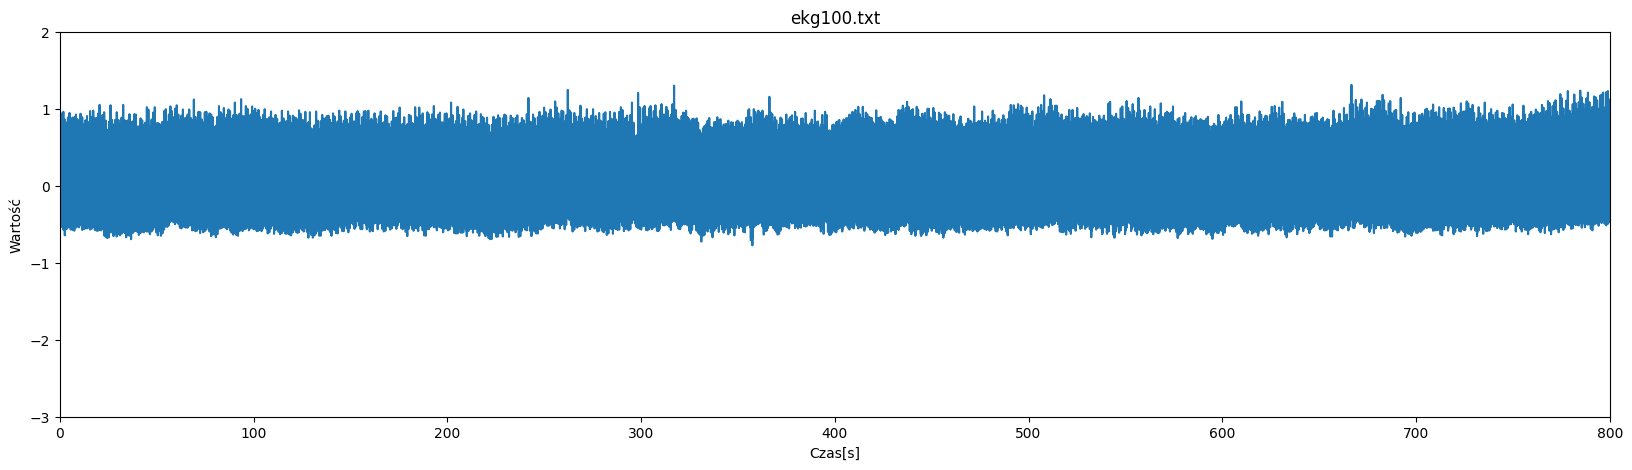

In [35]:
ekg100 = pd.read_csv('ekg100.txt', names=['1'])
sampling_frequency_ekg100 = 360 

ekg100['Czas'] = ekg100.index/sampling_frequency_ekg100 
ekg100 = ekg100.set_index('Czas')

plt.figure(figsize=(20,5))
plt.plot(ekg100.index, ekg100['1'])
plt.title('ekg100.txt')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.xlim(0,800)
plt.ylim(-3,2.0)
plt.show()

- Wyznaczyć jego dyskretną transformatę Fouriera i przedstawić widmo amplitudowe sygnału w funkcji częstotliwości w zakresie [0, fs/2], gdzie fs oznacza częstotliwość próbkowania.

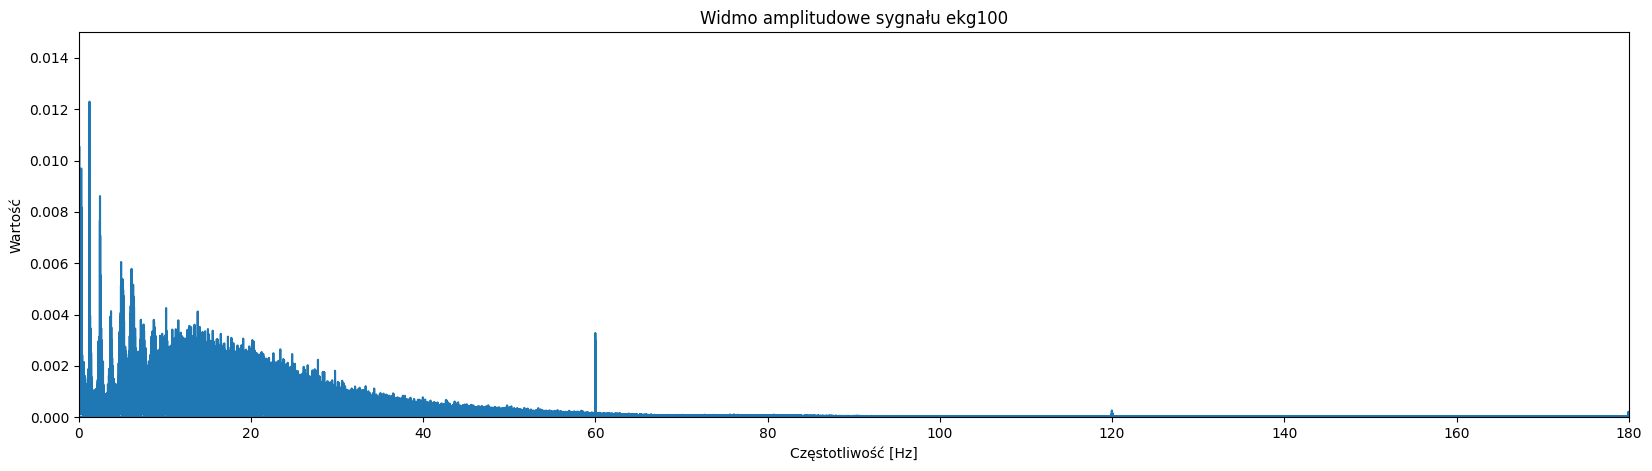

In [36]:
x = np.fft.fftfreq(ekg100.size, 1/sampling_frequency_ekg100)
y = np.abs(np.fft.fft(ekg100['1']))/(ekg100.size//2)

plt.figure(figsize=(20,5))
plt.plot(x, y)
plt.xlim(0,sampling_frequency_ekg100/2)
plt.ylim(0,0.015)
plt.title('Widmo amplitudowe sygnału ekg100')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Wartość')
plt.show()

- Wyznaczyć odwrotną dyskretną transformatę Fouriera ciągu wyznaczonego w punkcie 2 i porównać otrzymany ciąg próbek z pierwotnym sygnałem ekg100 (można wyznaczyć różnicę sygnałów).

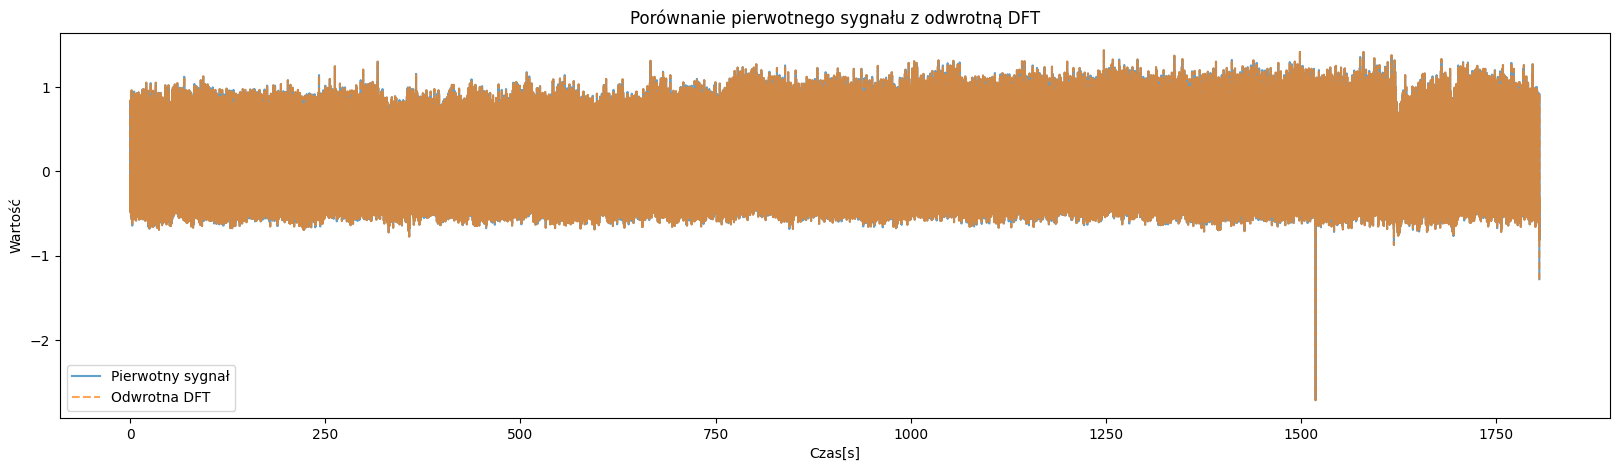

In [37]:
inverse_fft = np.fft.ifft(np.fft.fft(ekg100['1']))

plt.figure(figsize=(20, 5))
plt.plot(ekg100.index, ekg100['1'], label='Pierwotny sygnał', alpha=0.7)
plt.plot(ekg100.index, np.real(inverse_fft), label='Odwrotna DFT', linestyle='--', alpha=0.7)
plt.title('Porównanie pierwotnego sygnału z odwrotną DFT')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.legend()
plt.show()

## Ćwiczenie 4

- Wczytaj sygnał ekg noise.txt i zauważ zakłócenia nałożone na sygnał. Wykreślić częstotliwościową charakterystykę amplitudową sygnału.


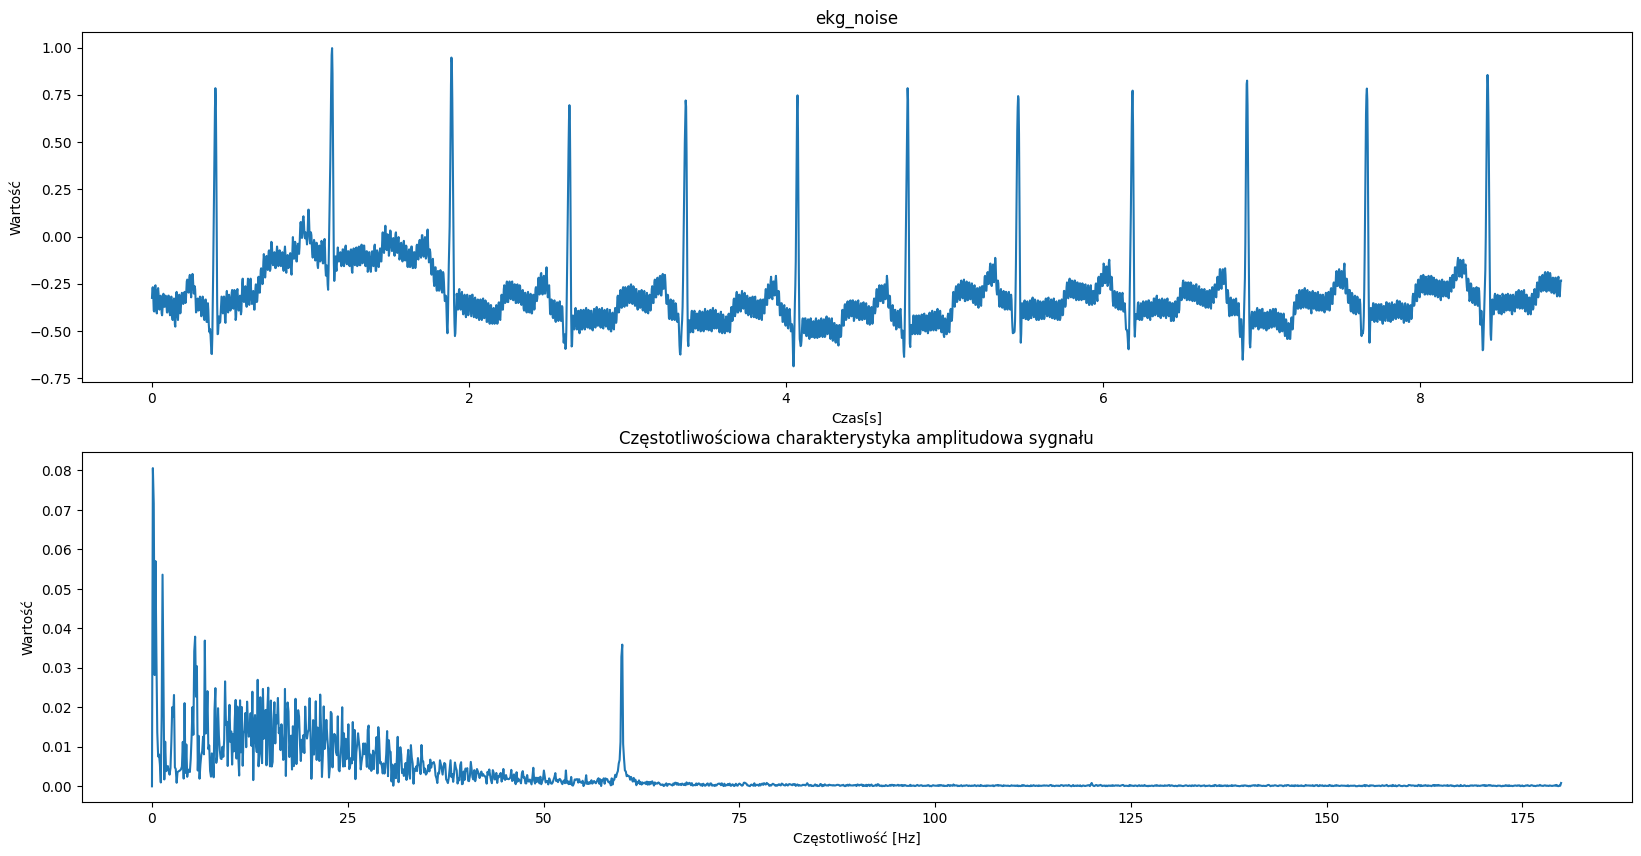

In [38]:
fs_ekg_noise = 360

ekg_noise = pd.read_csv('ekg_noise.txt', names=['Czas', 'Wartosc amplitudy'], sep=r'\s+').set_index('Czas')

widmo = np.abs(np.fft.rfft(ekg_noise['Wartosc amplitudy'] - ekg_noise['Wartosc amplitudy'].mean())) / (ekg_noise['Wartosc amplitudy'].size//2)

frequency = np.fft.rfftfreq(ekg_noise.size, 1/fs_ekg_noise) #  częstotliwościowa charakterystyka amplitudowa

plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1) 
plt.plot(ekg_noise)
plt.title('ekg_noise')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')

plt.subplot(2, 1, 2)
plt.plot(frequency, widmo) 
plt.title('Częstotliwościowa charakterystyka amplitudowa sygnału')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Wartość')
plt.show()

- Zbadaj filtr dolnoprzepustowy o częstotliwości granicznej 60 Hz w celu redukcji zakłóceń pochodzących z sieci zasilającej. Wyznacz parametry filtra, wykreśl jego charakterystykę (zależność tłumienia od częstotliwości), przebieg sygnału po filtracji oraz jego widmo. Można też wyznaczyć różnicę między sygnałem przed i po filtracji i widmo tej różnicy.

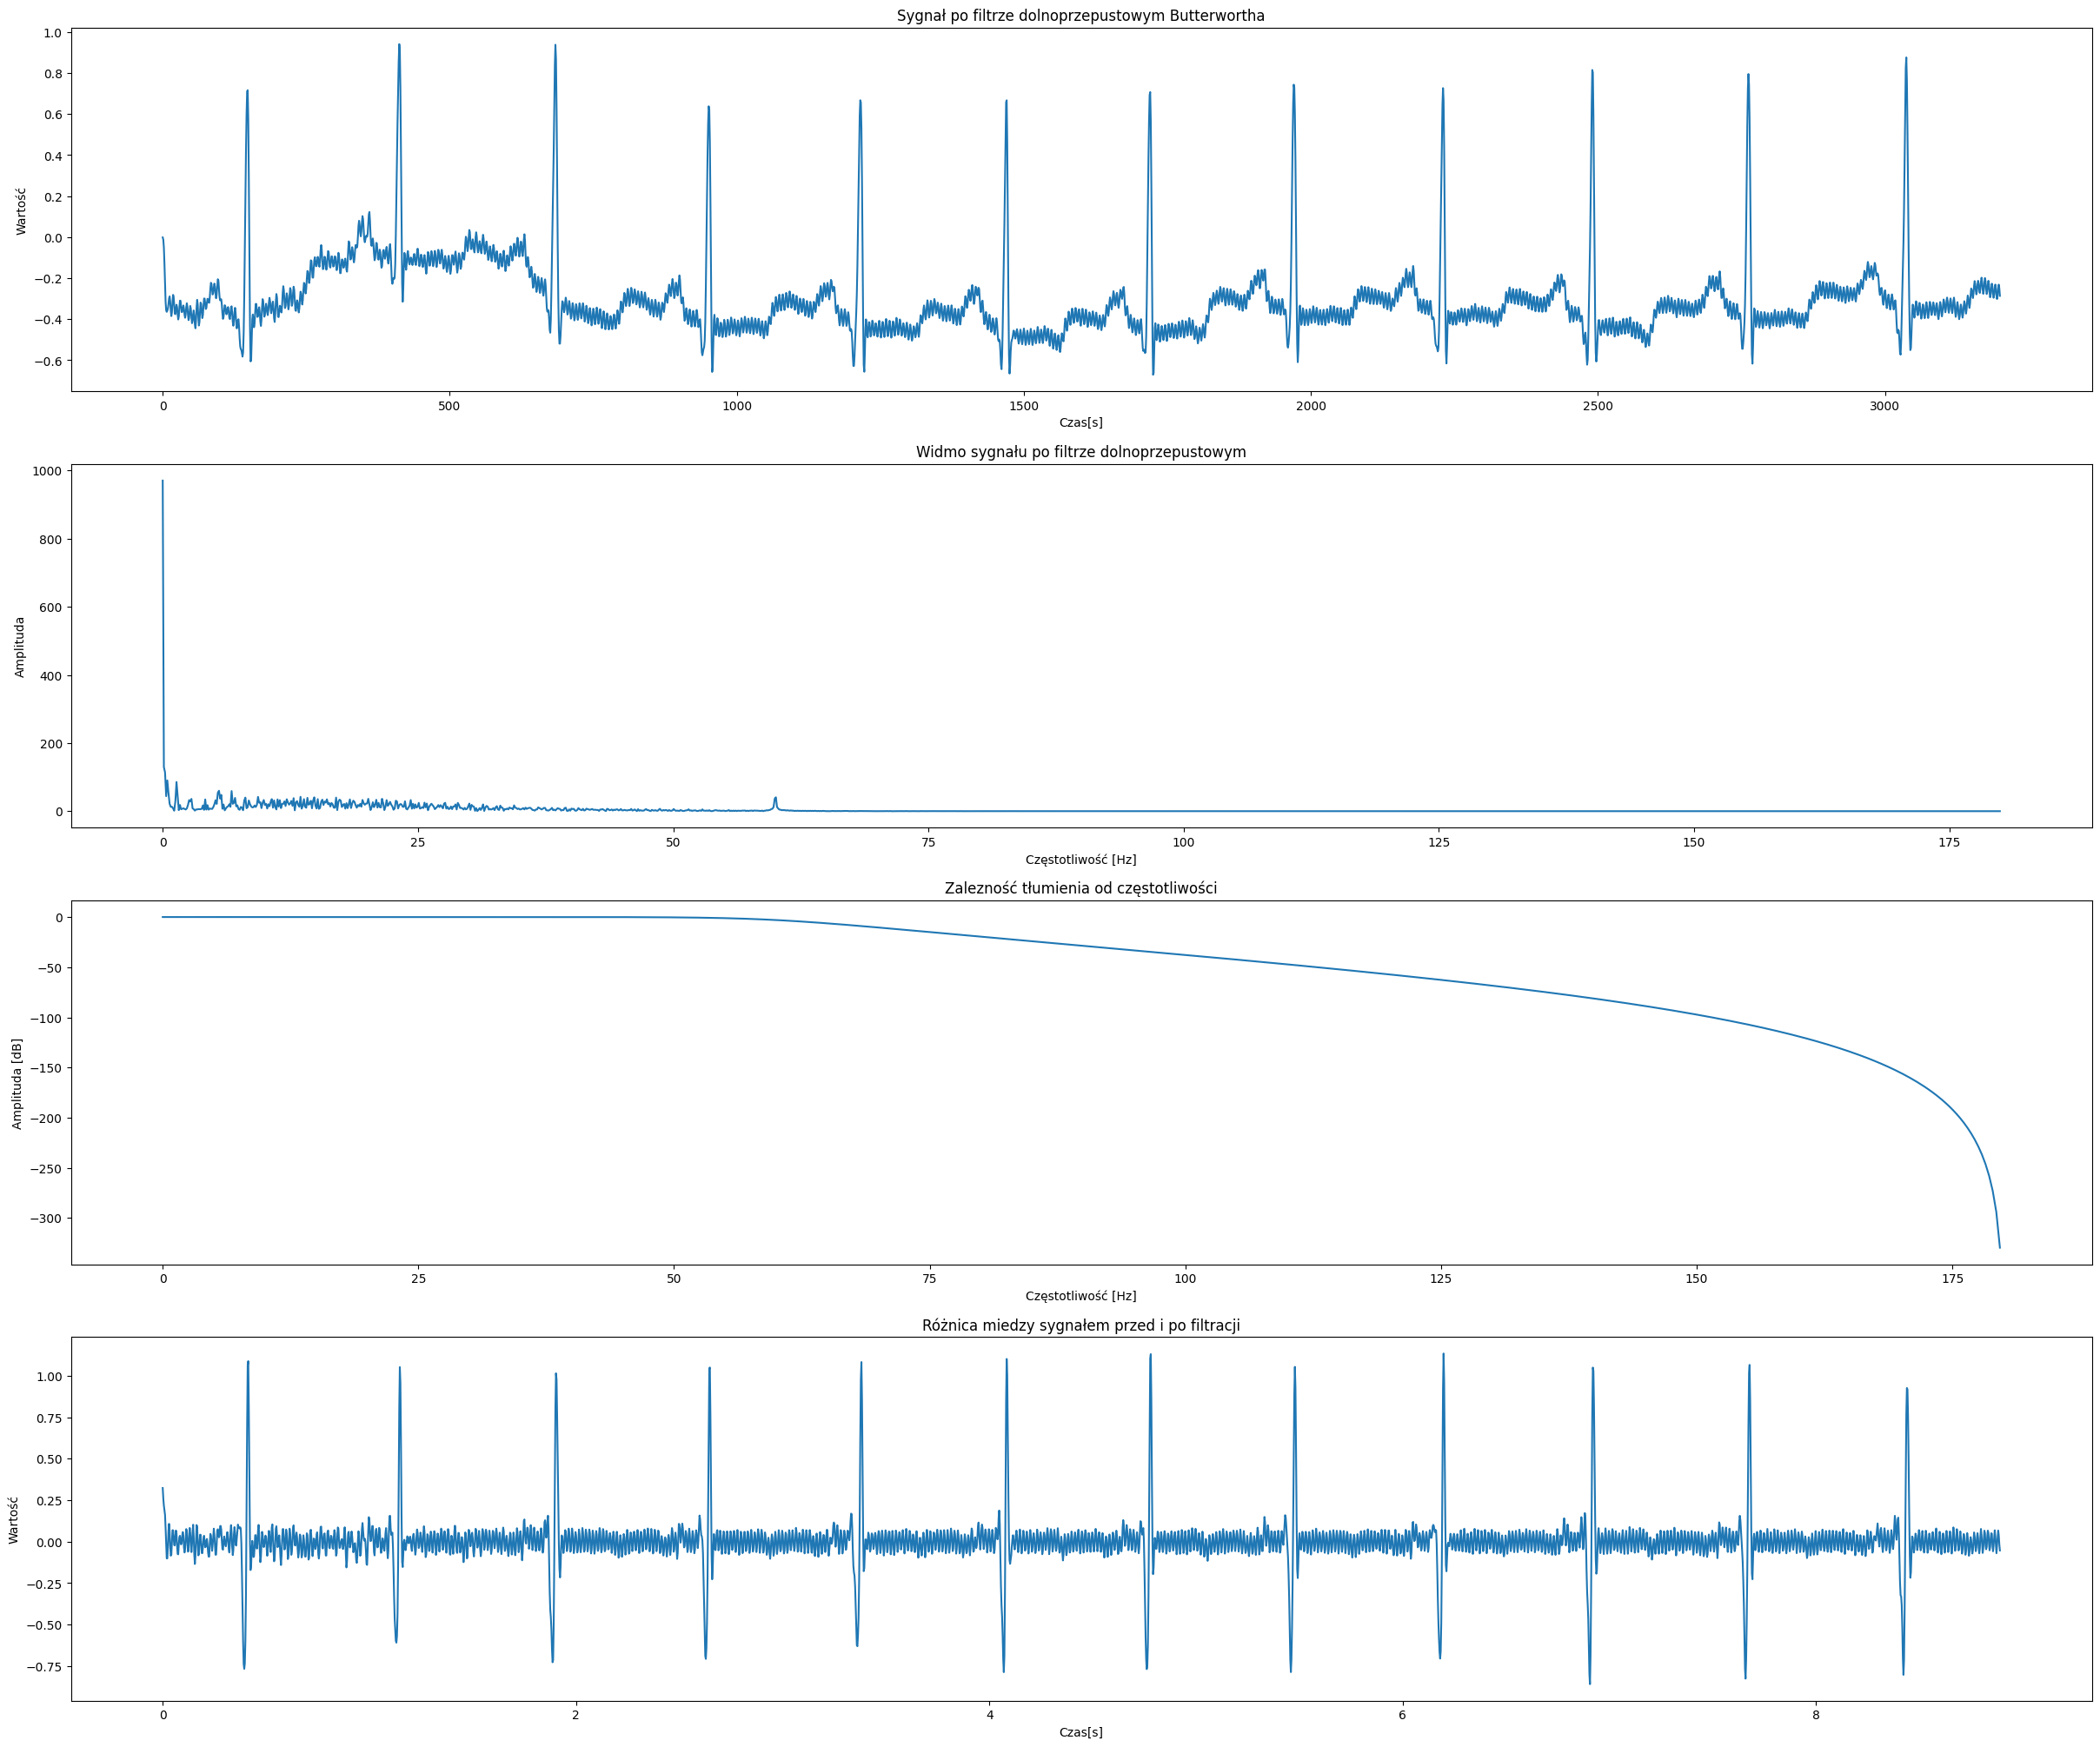

In [50]:
frequency_bound = 60 
butterworth_filter  = sig.butter(6, frequency_bound, 'low', output = 'sos', fs = sampling_frequency_ekg_noise )
filtered  = sig.sosfilt(butterworth_filter, ekg_noise['Wartosc amplitudy'])

plt.figure(figsize=(30,25))

plt.subplot(4, 1, 1) 
plt.plot(filtered )
plt.title('Sygnał po filtrze dolnoprzepustowym Butterwortha')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')

n = len(filtered)
freq = np.fft.rfftfreq(n, d=1/sampling_frequency_ekg_noise)
spectrum = np.abs(np.fft.rfft(filtered))

plt.subplot(4, 1, 2)
plt.plot(freq, spectrum)
plt.title('Widmo sygnału po filtrze dolnoprzepustowym')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')

b,a = sig.butter(6,frequency_bound/(sampling_frequency_ekg_noise/2), 'low')
w,h = sig.freqz(b,a)
x = w*sampling_frequency_ekg_noise / (2*np.pi)
y = 20*np.log10(abs(h))

plt.subplot(4, 1, 3) 
plt.plot(x,y)
plt.title('Zalezność tłumienia od częstotliwości')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')

plt.subplot(4, 1, 4)
plt.plot(filtered - ekg_noise['Wartosc amplitudy'])
plt.title('Różnica miedzy sygnałem przed i po filtracji')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.show()

- Zastosuj następnie, do sygnału otrzymanego w punkcie 2, filtr górnoprzepustowy o częstotliwości granicznej 5 Hz w celu eliminacji pływania linii izoelektrycznej. Sporządź wykresy sygnałów jak w punkcie 2.

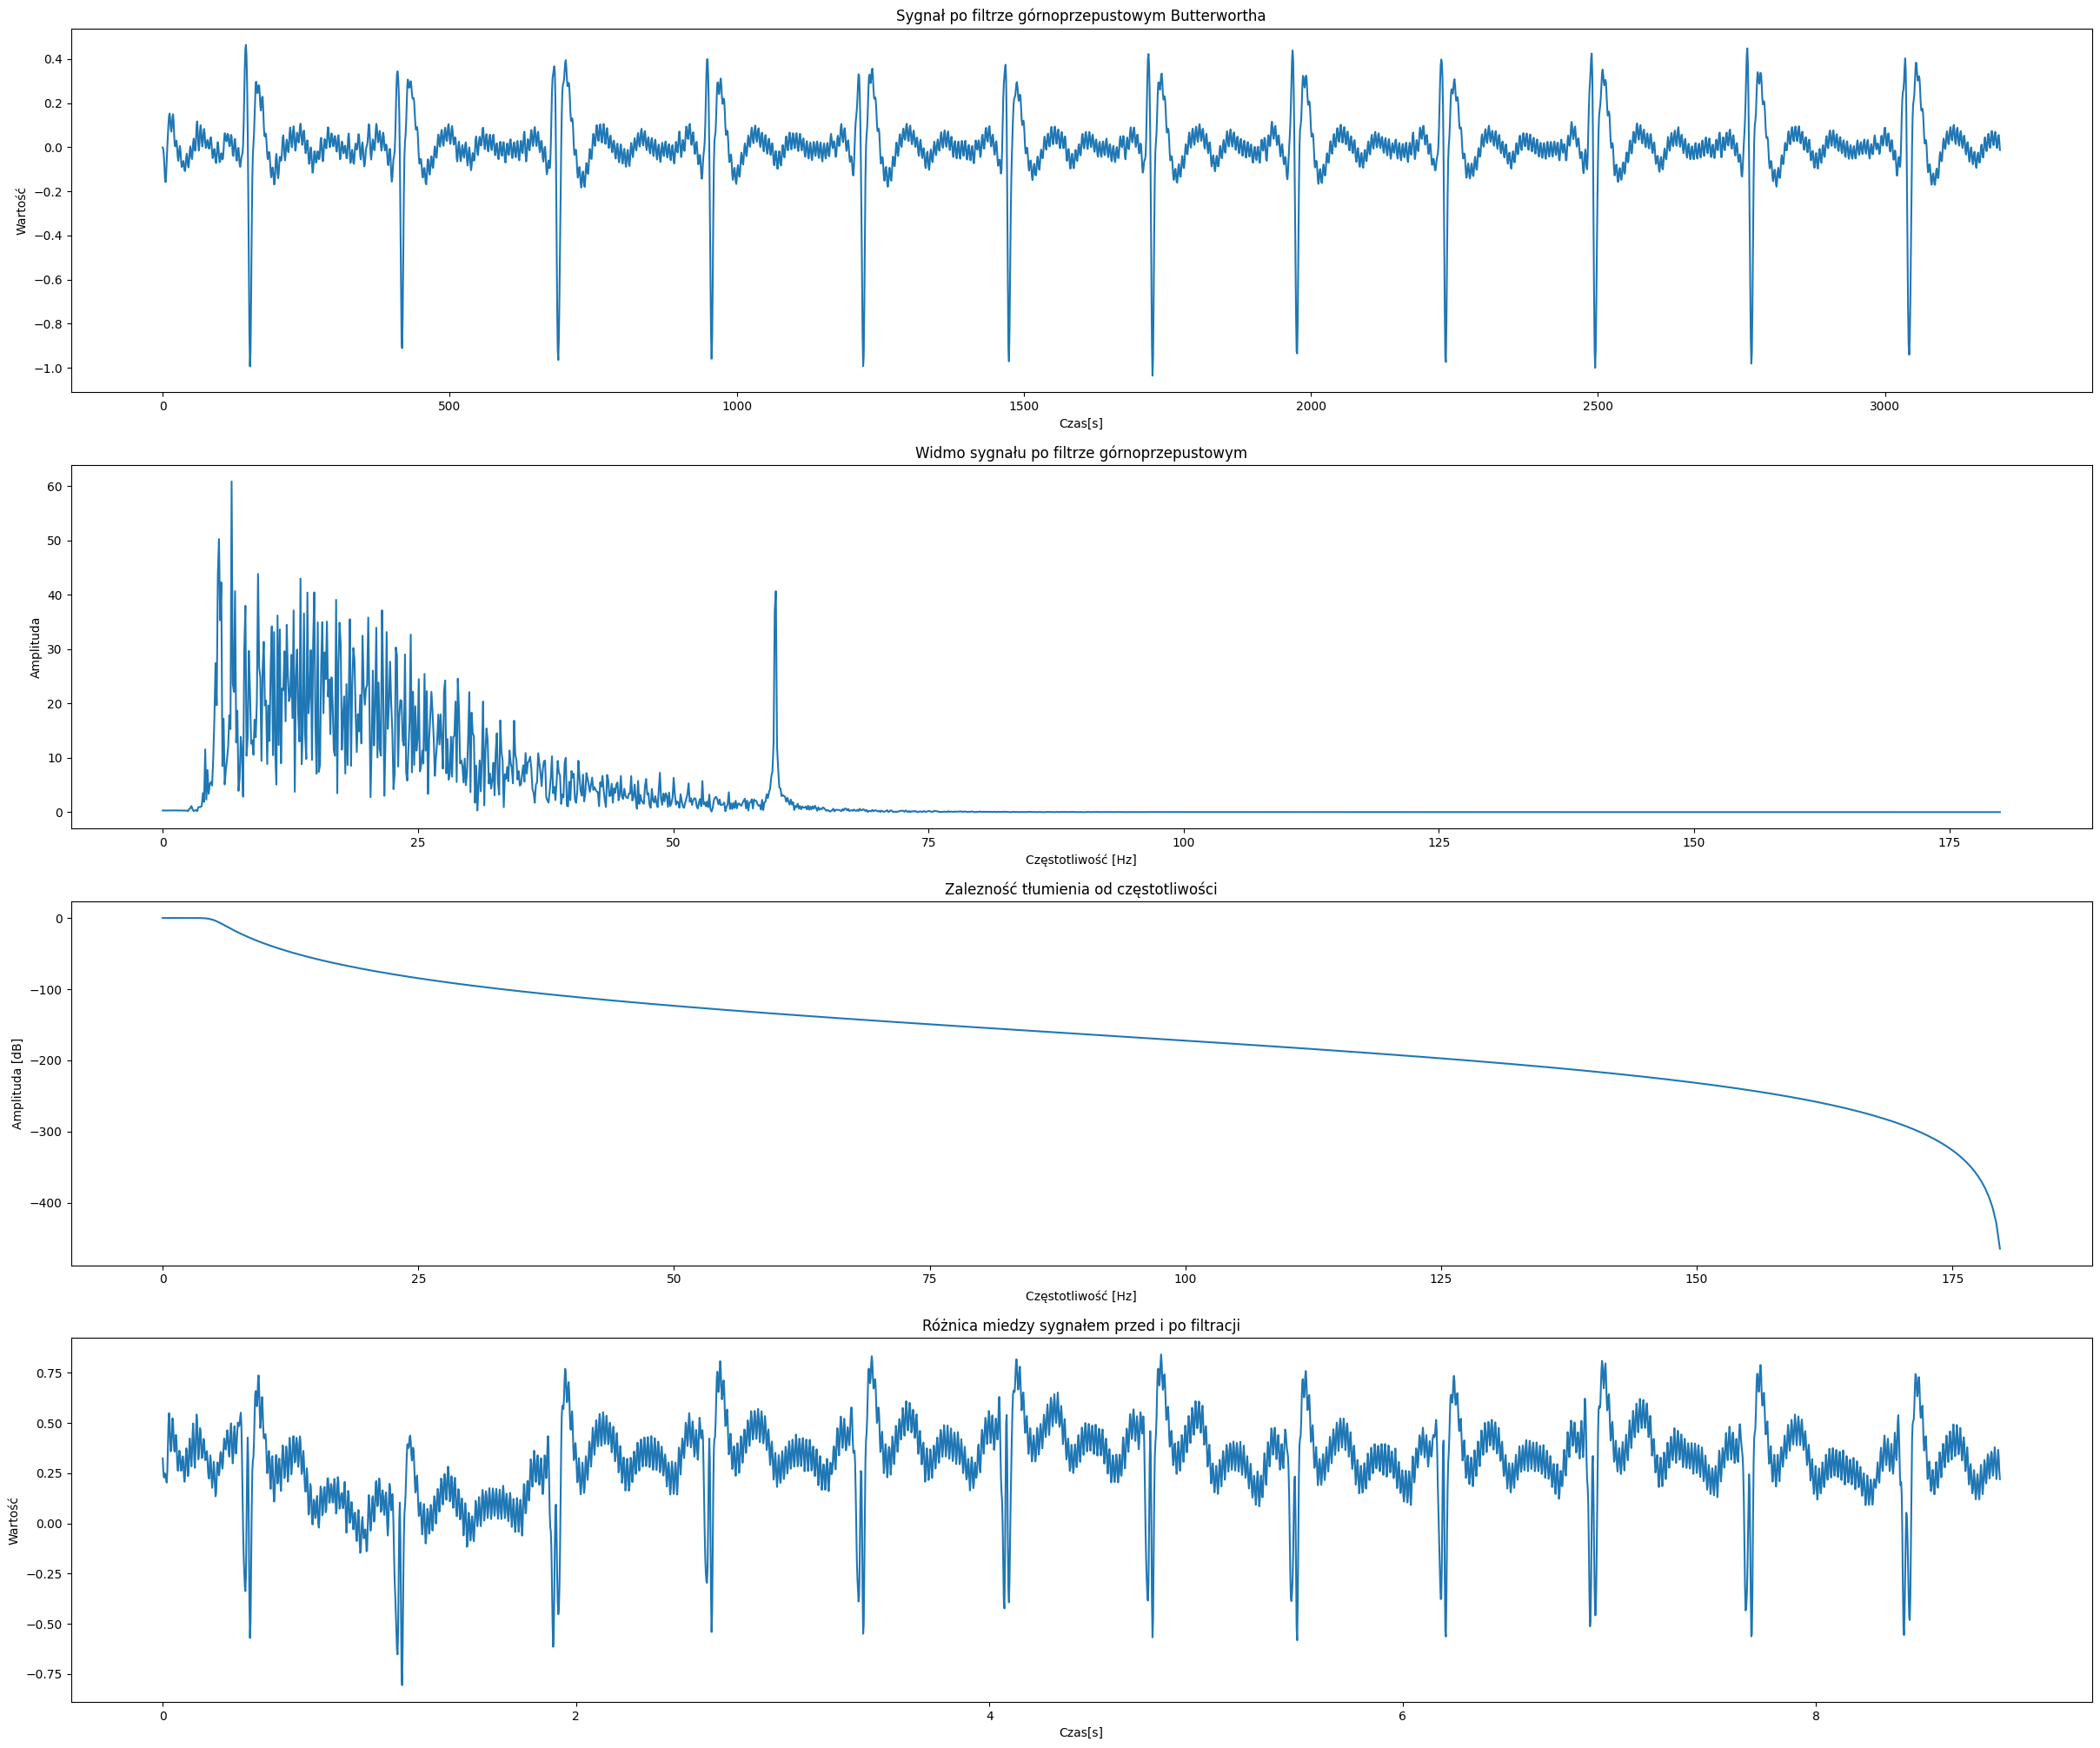

In [51]:
frequency_bound = 5

butterworth  = sig.butter(6, frequency_bound, 'high', output = 'sos', fs = sampling_frequency_ekg_noise) 
filtered_2 = sig.sosfilt(butterworth, filtered) 

plt.figure(figsize=(30,25))

plt.subplot(4, 1, 1)  
plt.plot(filtered_2)
plt.title('Sygnał po filtrze górnoprzepustowym Butterwortha')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')

n = len(filtered_2)
freq = np.fft.rfftfreq(n, d=1/sampling_frequency_ekg_noise)
spectrum = np.abs(np.fft.rfft(filtered_2))
plt.subplot(4, 1, 2)
plt.plot(freq, spectrum)
plt.title('Widmo sygnału po filtrze górnoprzepustowym')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')

b,a = sig.butter(6,frequency_bound/(sampling_frequency_ekg_noise/2), 'low') 
w,h = sig.freqz(b,a) 
x = w*sampling_frequency_ekg_noise / (2*np.pi)
y = 20*np.log10(abs(h))

plt.subplot(4, 1, 3) 
plt.plot(x,y)
plt.title('Zalezność tłumienia od częstotliwości')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')

plt.subplot(4, 1, 4)  
plt.plot(filtered_2 - ekg_noise['Wartosc amplitudy'])
plt.title('Różnica miedzy sygnałem przed i po filtracji')
plt.xlabel('Czas[s]')
plt.ylabel('Wartość')
plt.show()
